In [129]:
import pandas as pd
X=pd.read_csv(r"C:\Users\vidya\Downloads\RNN DataSet Twitter Sentiment Analysis (NLP & RNN ) complete program/twitter_training.csv",names=['Names','Target','Reviews'])
X

,Names,Target,Reviews
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
9200,Nvidia,Positive,Just realized that the Windows partition of my...
9200,Nvidia,Positive,Just realized that my Mac window partition is ...
9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
9200,Nvidia,Positive,Just realized between the windows partition of...


In [131]:
X=X.sample(20000)
X

,Names,Target,Reviews
11172,TomClancysGhostRecon,Negative,@GhostRecon the crashing issue always found ha...
6983,johnson&johnson,Negative,Just another small example of how black people...
10933,TomClancysGhostRecon,Negative,see
8543,NBA2K,Negative,I just witnessed John Stockton hit a two-hande...
8509,NBA2K,Negative,and RhandlerR this is how hard it is to beat t...
...,...,...,...
9734,PlayStation5(PS5),Neutral,"hmm, the latest PS4 got released in 2013 and I..."
4825,GrandTheftAuto(GTA),Irrelevant,"Quibi officially shut down, Jared Leto's Grand..."
922,AssassinsCreed,Positive,Criminally underrated. AC Rogue season was sho...
4307,CS-GO,Positive,Help me win this great CS: GO sweepstakes from...


In [133]:
X.reset_index(inplace=True)


In [134]:
X

,index,Names,Target,Reviews
0,11172,TomClancysGhostRecon,Negative,@GhostRecon the crashing issue always found ha...
1,6983,johnson&johnson,Negative,Just another small example of how black people...
2,10933,TomClancysGhostRecon,Negative,see
3,8543,NBA2K,Negative,I just witnessed John Stockton hit a two-hande...
4,8509,NBA2K,Negative,and RhandlerR this is how hard it is to beat t...
...,...,...,...,...
19995,9734,PlayStation5(PS5),Neutral,"hmm, the latest PS4 got released in 2013 and I..."
19996,4825,GrandTheftAuto(GTA),Irrelevant,"Quibi officially shut down, Jared Leto's Grand..."
19997,922,AssassinsCreed,Positive,Criminally underrated. AC Rogue season was sho...
19998,4307,CS-GO,Positive,Help me win this great CS: GO sweepstakes from...


In [135]:
X.drop(columns=['index'],inplace=True)
X

,Names,Target,Reviews
0,TomClancysGhostRecon,Negative,@GhostRecon the crashing issue always found ha...
1,johnson&johnson,Negative,Just another small example of how black people...
2,TomClancysGhostRecon,Negative,see
3,NBA2K,Negative,I just witnessed John Stockton hit a two-hande...
4,NBA2K,Negative,and RhandlerR this is how hard it is to beat t...
...,...,...,...
19995,PlayStation5(PS5),Neutral,"hmm, the latest PS4 got released in 2013 and I..."
19996,GrandTheftAuto(GTA),Irrelevant,"Quibi officially shut down, Jared Leto's Grand..."
19997,AssassinsCreed,Positive,Criminally underrated. AC Rogue season was sho...
19998,CS-GO,Positive,Help me win this great CS: GO sweepstakes from...


In [137]:
X.shape

(20000, 3)

In [138]:
X.isnull().sum()

Names        0
Target       0
Reviews    191
dtype: int64

In [139]:
X.dropna(inplace=True)

In [140]:
X.isnull().sum()

Names      0
Target     0
Reviews    0
dtype: int64

In [141]:
X.shape

(19809, 3)

In [142]:
X.reset_index(inplace=True)
X.head()

,index,Names,Target,Reviews
0,0,TomClancysGhostRecon,Negative,@GhostRecon the crashing issue always found ha...
1,1,johnson&johnson,Negative,Just another small example of how black people...
2,2,TomClancysGhostRecon,Negative,see
3,3,NBA2K,Negative,I just witnessed John Stockton hit a two-hande...
4,4,NBA2K,Negative,and RhandlerR this is how hard it is to beat t...


In [143]:
X.drop(columns='index',inplace=True)
X.head()

,Names,Target,Reviews
0,TomClancysGhostRecon,Negative,@GhostRecon the crashing issue always found ha...
1,johnson&johnson,Negative,Just another small example of how black people...
2,TomClancysGhostRecon,Negative,see
3,NBA2K,Negative,I just witnessed John Stockton hit a two-hande...
4,NBA2K,Negative,and RhandlerR this is how hard it is to beat t...


In [144]:
X['Target'].unique()

array(['Negative', 'Positive', 'Neutral', 'Irrelevant'], dtype=object)

In [145]:
X1=X['Target'].value_counts().reset_index()
X1

,Target,count
0,Negative,5988
1,Positive,5594
2,Neutral,4891
3,Irrelevant,3336


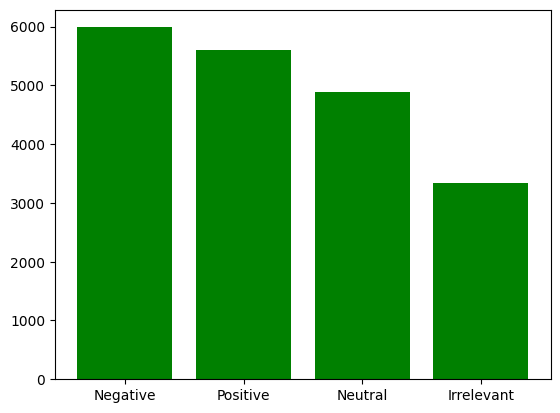

In [146]:
import matplotlib.pyplot as plt
plt.bar(X1['Target'],X1['count'],color='g')
plt.show()

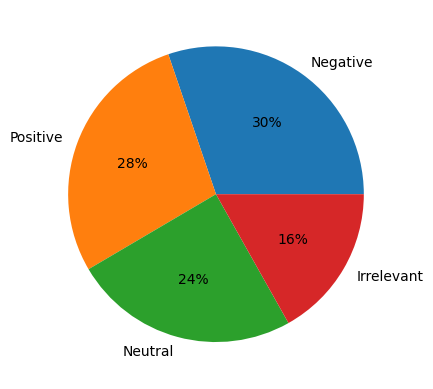

In [147]:
plt.pie(X1["count"].head(8),labels=X1["Target"].head(8),autopct="%.1d%%")
plt.show()

In [148]:
T=pd.get_dummies(X['Target']).replace({True:1,False:0})
T

C:\Users\vidya\AppData\Local\Temp\ipykernel_1072\3655198341.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T=pd.get_dummies(X['Target']).replace({True:1,False:0})


,Irrelevant,Negative,Neutral,Positive
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
19804,0,0,1,0
19805,1,0,0,0
19806,0,0,0,1
19807,0,0,0,1


In [149]:
X

,Names,Target,Reviews
0,TomClancysGhostRecon,Negative,@GhostRecon the crashing issue always found ha...
1,johnson&johnson,Negative,Just another small example of how black people...
2,TomClancysGhostRecon,Negative,see
3,NBA2K,Negative,I just witnessed John Stockton hit a two-hande...
4,NBA2K,Negative,and RhandlerR this is how hard it is to beat t...
...,...,...,...
19804,PlayStation5(PS5),Neutral,"hmm, the latest PS4 got released in 2013 and I..."
19805,GrandTheftAuto(GTA),Irrelevant,"Quibi officially shut down, Jared Leto's Grand..."
19806,AssassinsCreed,Positive,Criminally underrated. AC Rogue season was sho...
19807,CS-GO,Positive,Help me win this great CS: GO sweepstakes from...


In [150]:
N=pd.get_dummies(X['Names']).replace({True:1,False:0})
N

C:\Users\vidya\AppData\Local\Temp\ipykernel_1072\2755098711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  N=pd.get_dummies(X['Names']).replace({True:1,False:0})


,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,CallOfDuty,CallOfDutyBlackopsColdWar,Cyberpunk2077,Dota2,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19804,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19806,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19807,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

import re

from nltk.stem import PorterStemmer,   WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import numpy as np
import string


In [152]:
X.shape[0]

19809

In [153]:
Data1=[]
P=PorterStemmer()

for i in range(X.shape[0]):
    A=X.loc[i,'Reviews'] 
    for j in sent_tokenize(A): 
        B=re.sub('[^A-Za-z0-9]',' ',j)
        B=B.lower()
        B=B.split() 
        C=[P.stem(k)  for k in B if k not in set(stopwords.words('english'))]
        D=' '.join(C)
    Data1.append(D)

In [154]:
Data1

['nearli everytim visit fast travel object tri leav etc none lighter feel problem lie within first experi',
 'anoth small exampl black peopl even consid life',
 'see',
 'wit john stockton hit two hand tomahawk fast break myteam game got takeov sign',
 'rhandlerr hard beat cpu myteam pic twitter com rgn0x2pdfl',
 'feel deepli insid last day tonight awesom night boy got w today amaz fun time play',
 'cs go heyday probabl favorit',
 'game love ruin',
 'stun game still captur beauti',
 'match perfectli describ season 10 youtu ewdsndvh014',
 'anoth fun throwback enjoy tom clanci ghost recon lactos',
 'pleas tweet betray',
 'download fifa 20 god god game stink',
 'happi birthday red dead bird shit chang life crazi experi',
 '',
 'nevertheless want thank everyon support realli appreci',
 '11 fortnit room review constant endless continu revis squabbl rule boundari respons',
 'deep breath okay swear',
 'watch 20 minut ago realli lost world warcraft thing',
 'one best',
 'thank man listen',
 'lo

In [155]:
Data1=pd.DataFrame(Data1)
Data1.columns=['Reviews']

In [156]:
Data1

,Reviews
0,nearli everytim visit fast travel object tri l...
1,anoth small exampl black peopl even consid life
2,see
3,wit john stockton hit two hand tomahawk fast b...
4,rhandlerr hard beat cpu myteam pic twitter com...
...,...
19804,even make year earlier also still buy anyth ne...
19805,mercuri retrograd pop right
19806,ac rogu season short written good reason mostl...
19807,wn nr xvytf6


In [157]:
Data1=pd.concat([Data1,N,T],axis=1)
Data1

,Reviews,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,CallOfDuty,CallOfDutyBlackopsColdWar,Cyberpunk2077,...,TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Irrelevant,Negative,Neutral,Positive
0,nearli everytim visit fast travel object tri l...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,anoth small exampl black peopl even consid life,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,see,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,wit john stockton hit two hand tomahawk fast b...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,rhandlerr hard beat cpu myteam pic twitter com...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19804,even make year earlier also still buy anyth ne...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19805,mercuri retrograd pop right,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19806,ac rogu season short written good reason mostl...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19807,wn nr xvytf6,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [158]:
Data1.to_csv(r"C:\Users\vidya\Downloads\RNN DataSet Twitter Sentiment Analysis (NLP & RNN ) complete program/twitter_training_PROCESSED2.csv")

In [159]:
import pandas as pd
X1=pd.read_csv(r"C:\Users\vidya\Downloads\RNN DataSet Twitter Sentiment Analysis (NLP & RNN ) complete program/twitter_training_PROCESSED2.csv")
X1

,Unnamed: 0,Reviews,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,CallOfDuty,CallOfDutyBlackopsColdWar,...,TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Irrelevant,Negative,Neutral,Positive
0,0,nearli everytim visit fast travel object tri l...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,anoth small exampl black peopl even consid life,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2,see,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,3,wit john stockton hit two hand tomahawk fast b...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,rhandlerr hard beat cpu myteam pic twitter com...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19804,19804,even make year earlier also still buy anyth ne...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19805,19805,mercuri retrograd pop right,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19806,19806,ac rogu season short written good reason mostl...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19807,19807,wn nr xvytf6,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [160]:
X1['Tokens']=X1['Reviews'].apply(lambda x:str(x).split())
X1.head()

,Unnamed: 0,Reviews,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,CallOfDuty,CallOfDutyBlackopsColdWar,...,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Irrelevant,Negative,Neutral,Positive,Tokens
0,0,nearli everytim visit fast travel object tri l...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[nearli, everytim, visit, fast, travel, object..."
1,1,anoth small exampl black peopl even consid life,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,"[anoth, small, exampl, black, peopl, even, con..."
2,2,see,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,[see]
3,3,wit john stockton hit two hand tomahawk fast b...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[wit, john, stockton, hit, two, hand, tomahawk..."
4,4,rhandlerr hard beat cpu myteam pic twitter com...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[rhandlerr, hard, beat, cpu, myteam, pic, twit..."


In [161]:
X1['Token_len']=X1['Tokens'].apply(lambda x:len(x))
X1.head()

,Unnamed: 0,Reviews,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,CallOfDuty,CallOfDutyBlackopsColdWar,...,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Irrelevant,Negative,Neutral,Positive,Tokens,Token_len
0,0,nearli everytim visit fast travel object tri l...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,"[nearli, everytim, visit, fast, travel, object...",17
1,1,anoth small exampl black peopl even consid life,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,"[anoth, small, exampl, black, peopl, even, con...",8
2,2,see,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,[see],1
3,3,wit john stockton hit two hand tomahawk fast b...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,"[wit, john, stockton, hit, two, hand, tomahawk...",14
4,4,rhandlerr hard beat cpu myteam pic twitter com...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,"[rhandlerr, hard, beat, cpu, myteam, pic, twit...",9


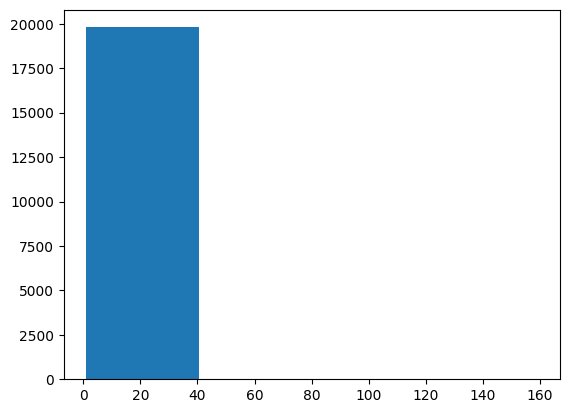

In [162]:
import matplotlib.pyplot as plt
plt.hist(X1['Token_len'],bins=4)
plt.show()

In [ ]:
pip install scipy==1.11.0


In [ ]:
pip install --upgrade gensim


In [ ]:
pip install scipy==1.10.1

In [ ]:
pip install numpy==1.26.4

In [ ]:
import gensim
from gensim.models import Word2Vec

W2v=Word2Vec(sentences=X1['Tokens'],window=3,sg=0,vector_size=600,min_count=2,workers=-1)

In [ ]:
def vectorizer(Token,W2v,vector_size=600):
    vector=[W2v.wv[i] for i in Token if i in W2v.wv ]
    if vector:
        return np.mean(vector,axis=0) 
    else:
        return np.zeros(vector_size) 

In [ ]:
import numpy as np
X1['Vectors']=X1['Tokens'].apply(lambda x:vectorizer(x,W2v,vector_size=600))
X1.head()

In [ ]:
TR=pd.DataFrame(X1['Vectors'].tolist())
TR.head()

In [ ]:
Name=X1[X.Names.unique()]
Name

In [ ]:
from sklearn.decomposition import PCA
PC=PCA(n_components=0.70)
N1=PC.fit_transform(Name)
N2=pd.DataFrame(N1,columns=PC.get_feature_names_out())
N2

In [ ]:
TRF=pd.concat([TR,N2],axis=1)
TRF.head()

In [ ]:
co=[]
for i in TRF.columns:
    co.append(str(i))
    
TRF.columns=co

In [ ]:
PC2=PCA(n_components=0.95)
TRF1=PC2.fit_transform(TRF)
TRF1=pd.DataFrame(TRF1)
TRF1

In [ ]:
T

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN, Embedding, GRU
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [ ]:
X = TRF1
y = T

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # (samples, time steps, features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
# LSTM layer (captures long-term dependencies)
model.add(LSTM(256, activation='relu',input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))

# Simple RNN layer (captures short-term dependencies)
model.add(SimpleRNN(128, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(SimpleRNN(256, activation='relu', return_sequences=True))
model.add(SimpleRNN(128, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(SimpleRNN(90, activation='relu', return_sequences=True))

model.add(LSTM(84, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dropout(0.1))

# GRU layer (captures long-term dependencies with fewer parameters)
model.add(GRU(64, activation='relu', return_sequences=True))  # Return sequences=False for final output
model.add(SimpleRNN(90, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(SimpleRNN(90, activation='relu', return_sequences=False))

# Optionally add a Dropout layer to prevent overfitting
model.add(Dropout(0.1))

# Fully connected layer
model.add(Dense(124, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer for multi-class classification (assuming you have 3 sentiment classes)
model.add(Dense(y.shape[1], activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test))

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

In [ ]:
test_acc*100

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train)

In [ ]:
train_acc*100

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], lw=3,ls='--',c='g',label='Training Accuracy')
plt.plot(history.history['val_accuracy'], lw=4,ls='-.',marker="o",markersize=7,c='r',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("RNN,LSTM,GRU MODEL Training & Validation Accuracy-------->")
plt.legend()
plt.grid()
plt.show()